<a href="https://colab.research.google.com/github/juhumkwon/DataMining/blob/main/YOLO(PyTorch_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 필요한 라이브러리 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 42.3 MB/s eta 0:00:00



0: 640x640 1 bird, 233.0ms
Speed: 5.1ms preprocess, 233.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
x1, y1, x2, y2, confidence, cls = 71 168 534 522 tensor(0.8217) 14


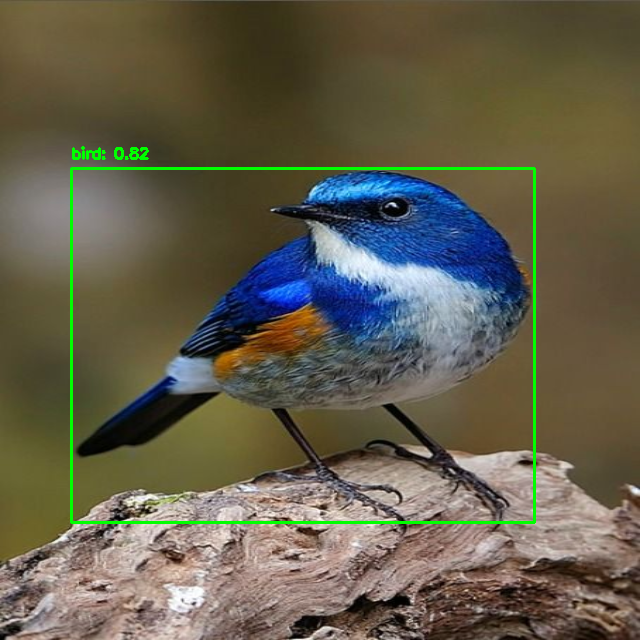

In [11]:
import torch
import cv2
import numpy as np
from ultralytics import YOLO

from google.colab import files
import matplotlib.pyplot as plt
import io # import io module
# Import the cv2_imshow function from google.colab.patches
from google.colab.patches import cv2_imshow


# YOLO 모델 로드 (YOLOv8 모델 사용 예시)
model = YOLO('yolov8n.pt')  # 사전 학습된 YOLOv8 모델

"""
# 테스트 이미지 로드
image_path = files.upload()  # 로컬에서 이미지 파일을 업로드
# Get the filename and file content from the uploaded dictionary
filename = list(image_path.keys())[0]
# Read the image content into a NumPy array using OpenCV
image_stream = io.BytesIO(image_path[filename]) # create an in-memory stream
image = cv2.imdecode(np.frombuffer(image_stream.read(), np.uint8), cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 이미지를 RGB로 변환
image_resized = cv2.resize(image, (640, 640))  # YOLO 입력 크기로 변환
"""
# 이미지 로드
image_path = '/content/bird.jpg'
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (640, 640))  # YOLO 입력 크기로 변환


# 예측 수행
results = model.predict(image_resized, conf=0.5)  # 50% 이상의 확신만 포함

# 결과 처리 및 바운딩 박스 시각화
for result in results:
    for box in result.boxes:  # 예측된 바운딩 박스들
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        confidence = box.conf[0]  # 객체 확률
        cls = int(box.cls[0])  # 클래스 ID
        print("x1, y1, x2, y2, confidence, cls =", x1, y1, x2, y2, confidence, cls)

        # 클래스 이름 및 바운딩 박스 표시
        label = f"{model.names[cls]}: {confidence:.2f}"
        cv2.rectangle(image_resized, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_resized, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 결과 이미지 저장 및 표시
cv2.imwrite('output_image.jpg', image_resized)
# Use cv2_imshow instead of cv2.imshow
cv2_imshow(image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
